In [1]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.vision.all import *
from fastai.text.all import *
from fastai.collab import *
from fastai.tabular.all import *

In [3]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from matplotlib import pyplot
%matplotlib notebook

In [4]:
path = ('/home/ccet/Self-Supervised-Learning/covid/archive(2)')

In [5]:
fnames = get_image_files(path)
def label_func(x): return x.parent.name
data=ImageDataLoaders.from_path_func(path, fnames, label_func,  valid_pct=0.2, seed=None, item_tfms=Resize(224), bs=64)


In [6]:
learn = cnn_learner(data, models.resnet50, metrics= [accuracy, Precision(average='micro'), F1Score(average='micro')])

In [7]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,precision_score,f1_score,time
0,0.103436,0.054193,0.982982,0.982982,0.982982,02:06
1,0.049517,0.034815,0.987808,0.987808,0.987808,02:03
2,0.032967,0.022052,0.993904,0.993904,0.993904,01:34
3,0.014543,0.012713,0.995682,0.995682,0.995682,01:06
4,0.008046,0.012589,0.995428,0.995428,0.995428,01:06
5,0.003847,0.012068,0.995428,0.995428,0.995428,01:06


<IPython.core.display.Javascript object>


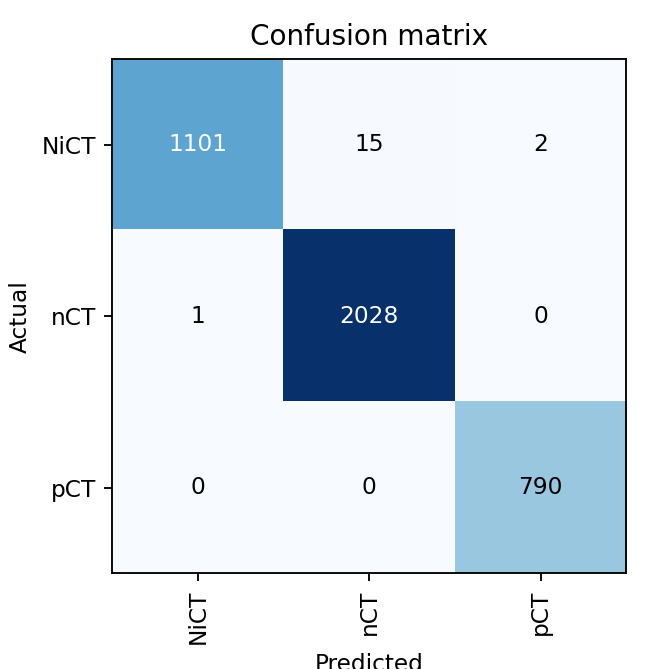

In [8]:
Interp = ClassificationInterpretation.from_learner(learn)
Interp.plot_confusion_matrix(figsize=(4,4),dpi=120)